<a href="https://colab.research.google.com/github/MauricioMatheus/Data-Structures-2_U1P1/blob/main/AED2_U1P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**REQUISITO 1 - Avaliação da série temporal 2010-2025**

In [2]:
!pip install joypy

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from joypy import joyplot
import os
import random


In [4]:
#Organizando os arquvos
pasta = "/content/Anos" #usado posteriormente com 'os'
anos = range(2010, 2025) #dados de 2010 à 2025
arquivos = [f"/content/Anos/{ano}_authors_network.gexf" for ano in anos] #Analisando arquivo por arquivo


In [5]:
#Guardando os resultados em um dicionario com uma lista para cada tópico

avaliações = {
    "ano": [],
    "num vertices": [],
    "num arestas": [],
    "densidade" : [],
    "num medio de vizinhos" : [], #média dos graus dos nós (grau = numero de vizihos/conexões por nó)
    "distribuicao num de vizinhos" : []
}



In [6]:
#incrementando os dados nas listas do dicionário

for arquivo, ano in zip(arquivos, anos):  #'zip' combina duas listas
  caminho = os.path.join(pasta, arquivo) #indo direto no arquivo
  G = nx.read_gexf(caminho)

  graus = [g for _, g in G.degree()] #pegando apenas os graus das tuplas, ignorando os nós
  media = sum(graus) / len(graus)

  avaliações["ano"].append(ano)
  avaliações["num vertices"].append(G.number_of_nodes())
  avaliações["num arestas"].append(G.number_of_edges())
  avaliações["densidade"].append(nx.density(G))
  avaliações["num medio de vizinhos"].append(media)
  avaliações["distribuicao num de vizinhos"].append(graus)



Com os dados devidamente guardados no dicionário, podemos plotar as quatro curvas, as quais representam vértices, arestas, densidade e número médio de vizinhos.

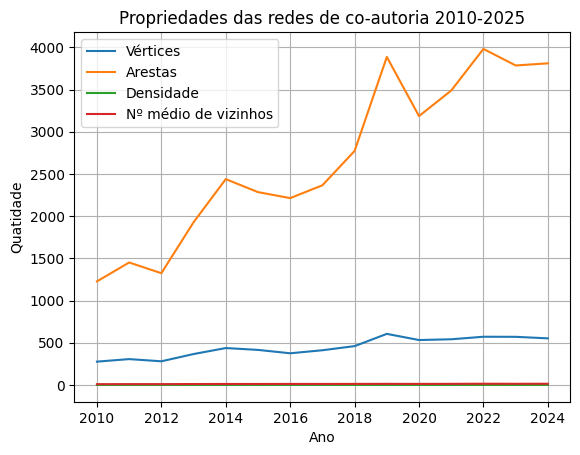

In [7]:
plt.plot(avaliações["ano"], avaliações["num vertices"], label= "Vértices")
plt.plot(avaliações["ano"], avaliações["num arestas"], label= "Arestas")
plt.plot(avaliações["ano"], avaliações["densidade"], label= "Densidade")
plt.plot(avaliações["ano"], avaliações["num medio de vizinhos"], label= "Nº médio de vizinhos")
plt.xlabel("Ano")
plt.ylabel("Quatidade")
plt.title("Propriedades das redes de co-autoria 2010-2025")
plt.legend()
plt.grid(True)
plt.show()



  Com as quatro curvas plotadas, podemos observar resultados bastante coerentes. Primeiramente, observamos que o número de arestas é muito elevado em comparação às outras curvas, isso é justificável pelo motivo de que existem muitas colaborações entre os autores (vértices).

  As vértices condizem com a quantidade de autores, e a densidade e Nº médio de vizinhos se apresentam em uma escala bem pequena. O grau médio pode estar baixo por causa das colaborações limitadas por tempo, área e/ou afinidade, enquanto em relação à densidade intuitivamente observa-se que é por consequência da grande quantidade de autores e pouca variedade de colaborações.

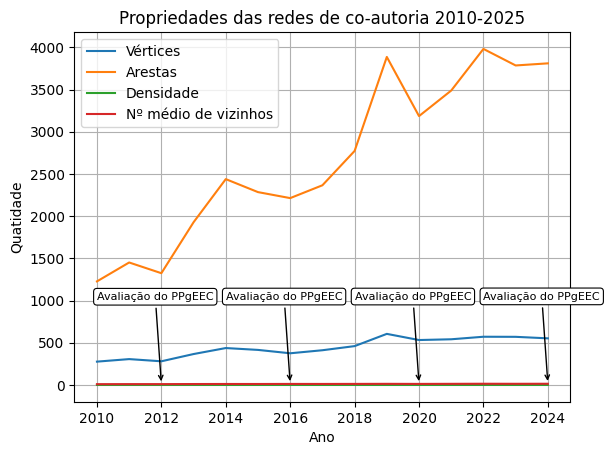

In [8]:
#Destacando avaliações do PPgEEC
marcos = {
    2012 : "Avaliação do PPgEEC",
    2016 : "Avaliação do PPgEEC",
    2020 : "Avaliação do PPgEEC",
    2024 : "Avaliação do PPgEEC"
}

plt.plot(avaliações["ano"], avaliações["num vertices"], label= "Vértices")
plt.plot(avaliações["ano"], avaliações["num arestas"], label= "Arestas")
plt.plot(avaliações["ano"], avaliações["densidade"], label= "Densidade")
plt.plot(avaliações["ano"], avaliações["num medio de vizinhos"], label= "Nº médio de vizinhos")
plt.xlabel("Ano")
plt.ylabel("Quatidade")
plt.title("Propriedades das redes de co-autoria 2010-2025")

#Fazendo anotações nos anos importantes
for ano, texto in marcos.items():
  idx = avaliações["ano"].index(ano)
  valor_y = avaliações["num medio de vizinhos"][idx]

  plt.annotate("Avaliação do PPgEEC",
             xy=(ano, valor_y),
             xytext=(ano - 2, valor_y + 1000),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=8,
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.8))
plt.legend()
plt.grid(True)
plt.show()

Destacando acontecimentos importantes nos anos de 2012, 2016, 2020 e 2024, podemos notar um grande crescimento no número de arestas, representando as colaborações, e um crescimento siginficativo nas vértices (Número de autores).

In [9]:
#Garatindo que o num médio de vizinhos está coerente e correto
for i in range(0, len(avaliações["ano"])):
  print(avaliações["num medio de vizinhos"])


[8.891304347826088, 9.483660130718954, 9.457142857142857, 10.53551912568306, 11.162471395881006, 11.012048192771084, 11.808, 11.51338199513382, 12.056521739130435, 12.849586776859503, 11.977443609022556, 12.898336414048059, 13.947460595446586, 13.284210526315789, 13.807971014492754]
[8.891304347826088, 9.483660130718954, 9.457142857142857, 10.53551912568306, 11.162471395881006, 11.012048192771084, 11.808, 11.51338199513382, 12.056521739130435, 12.849586776859503, 11.977443609022556, 12.898336414048059, 13.947460595446586, 13.284210526315789, 13.807971014492754]
[8.891304347826088, 9.483660130718954, 9.457142857142857, 10.53551912568306, 11.162471395881006, 11.012048192771084, 11.808, 11.51338199513382, 12.056521739130435, 12.849586776859503, 11.977443609022556, 12.898336414048059, 13.947460595446586, 13.284210526315789, 13.807971014492754]
[8.891304347826088, 9.483660130718954, 9.457142857142857, 10.53551912568306, 11.162471395881006, 11.012048192771084, 11.808, 11.51338199513382, 12.0

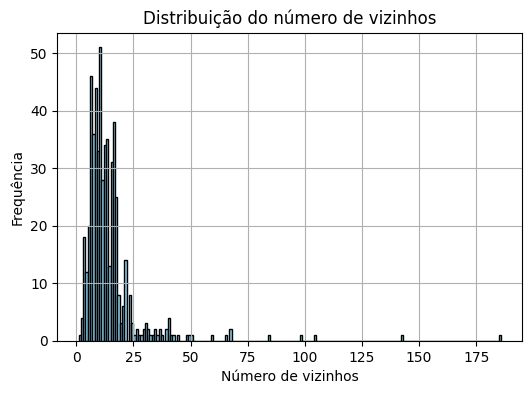

In [10]:
#Plotando o histograma

plt.figure(figsize=(6, 4))
plt.hist(graus, bins=range(1, max(graus)+2), edgecolor = 'black', color='skyblue')
plt.title(f"Distribuição do número de vizinhos")
plt.xlabel("Número de vizinhos")
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

Primeiramente foi plotado este histograma para analisar a distribuição do número de vizinhos de cada grafo. De forma coerente, notou-se uma grande quantidade de vizinhos/colaborações, isso é, nós/autores com grau 0-25, e pequenas quantidades de nós com grau entre 25-50, reduzindo mais ainda para quantias maiores de vizinhos.

In [11]:
#Criando um DataFrame com a distribuição de graus por ano para criar o Ridgeline Plot

grafos = [i for i in os.listdir(pasta) if i.endswith(".gexf")] #Lista com os arquivos que terminam em gexf

def extrair_ano(nome_arquivo):
  return int(nome_arquivo[:4])
  print(nome_arquivo[:4])

#Ordenando os arquivos com base nos anos extraídos

arquivos_ordenados = sorted([(extrair_ano(f), os.path.join(pasta, f)) for f in grafos]) #lista de tuplas com ano e caminho do arquivo



In [12]:
dados = []

for ano, caminho in arquivos_ordenados:
    G = nx.read_gexf(caminho)
    graus = [g for _, g in G.degree()]

    # Para cada grau, adicionando a contagem ao DataFrame
    for grau in graus:
        dados.append({'Ano': ano, 'Grau': grau})

# Criando o DataFrame
df = pd.DataFrame(dados)

# Verificando as distribuições de grau
distribuicao_grau_por_ano = df.groupby(['Ano', 'Grau']).size().unstack(fill_value=0)

distribuicao_grau_por_ano.to_csv("distribuicao_grau_por_ano.csv")




In [13]:
caminho_csv = 'distribuicao_grau_por_ano.csv'

# Lendo o CSV no DataFrame
df_lido = pd.read_csv(caminho_csv)

display(df_lido)

Ano  1   2   3   4   5   6   7   8   9  ...  122  126  129  132  135  \
0   2010  1  14  24  24  33  35  14  30  17  ...    0    0    0    0    0   
1   2011  0   3  35  25  17  29  29  25  57  ...    0    0    0    0    0   
2   2012  0  10  29  23  22  27  22  21  17  ...    0    0    0    0    0   
3   2013  0   8  16  26  35  36  43  37  42  ...    0    0    0    0    0   
4   2014  1   6  18  16  38  37  64  41  26  ...    0    0    0    0    0   
5   2015  0   5  17  20  31  46  43  49  42  ...    0    0    0    0    0   
6   2016  3   7  19  16  23  31  28  32  24  ...    0    0    0    0    0   
7   2017  0   7  15   3  44  21  65  32  34  ...    0    0    0    0    0   
8   2018  0  14  21  17  35  22  37  54  34  ...    0    0    0    0    0   
9   2019  2   7  21  20  34  38  88  27  70  ...    0    0    1    0    0   
10  2020  0   6  18  16  35  68  74  50  28  ...    0    0    0    0    1   
11  2021  3  10  16  20  39  32  39  81  45  ...    0    0    0    1    1   
12  2022  0   4  12  18  26  58  47  56  29  ...    0    0    0    0    0   
13  2023  1   4   8  21  39  50  68  33  37  ...    1    1    0    0    0   
14  2024  1   4  18  12  20  46  36  44  33  ...    0    0    0    0    0   
15  2025  0   0   0   5   5   7   4   8  19  ...    0    0    0    0    0   

    136  142  147  185  186  
0     0    0    0    0    0  
1     0    0    0    0    0  
2     0    0    0    0    0  
3     0    0    0    0    0  
4     0    0    0    0    0  
5     0    0    0    0    0  
6     0    0    0    0    0  
7     0    0    0    0    0  
8     0    0    0    0    0  
9     1    0    0    0    0  
10    0    0    0    0    0  
11    0    0    0    0    0  
12    0    0    0    0    1  
13    0    0    1    0    0  
14    0    1    0    1    0  
15    0    0    0    0    0  

[16 rows x 110 columns]

Após criar o dataframe com a distribuição de graus, pudemos finalmente plotar o Ridgeline Chart

(<Figure size 1000x800 with 17 Axes>,
 [<Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: title={'center': 'Distribuição de Graus por ano'}>])

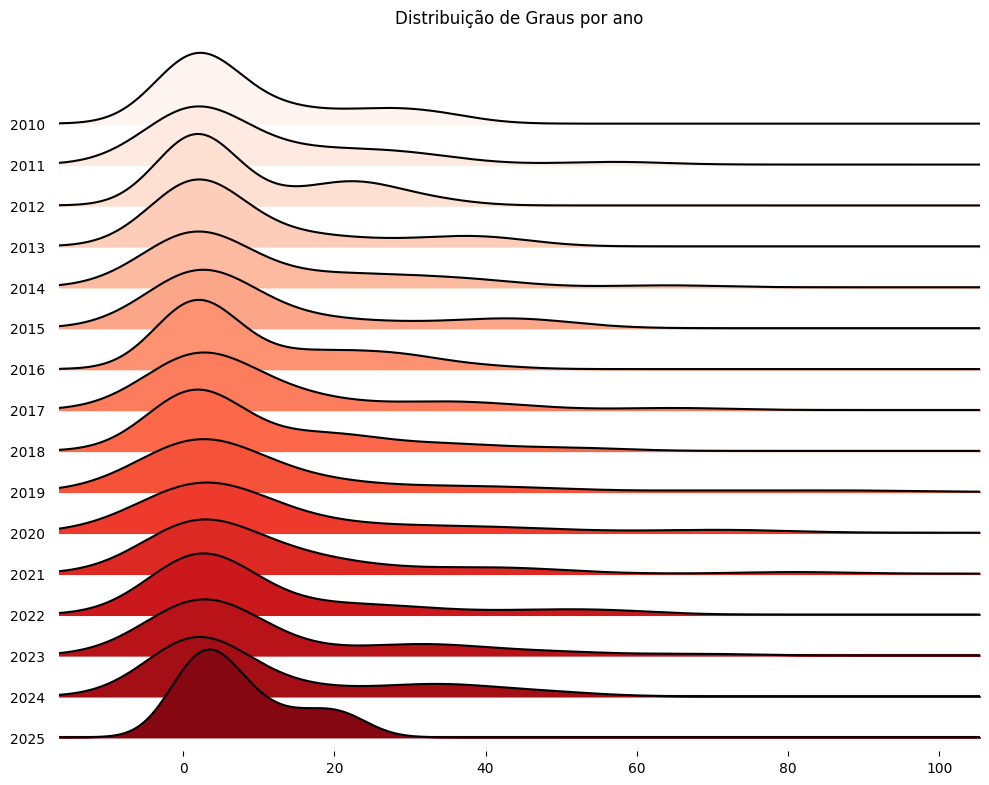

In [14]:
#Plotando o ridgeline chart

ridge = []

for ano in df['Ano'].unique():
  distribuicao = df[df['Ano'] == ano]['Grau'].value_counts().sort_index()
  ridge.append(distribuicao)


joyplot(
    data=ridge,
    labels=[str(ano) for ano in df['Ano'].unique()],
    title="Distribuição de Graus por ano",
    figsize=(10,8),
    colormap=plt.cm.Reds
)

Representando basicamente os mesmos resultados que o primeiro histograma feito, aqui temos uma indicação mais visível de que em 15 anos os graus predominantes das vértices (Autores) permaneceram entre 0-25. Uma explicação possível para isso pode ser a familiaridade que determinados pesquisadores podem ter com outros, o que explicaria essa quantia "fixa" de numéro de vizinhos no decorrer dos anos.

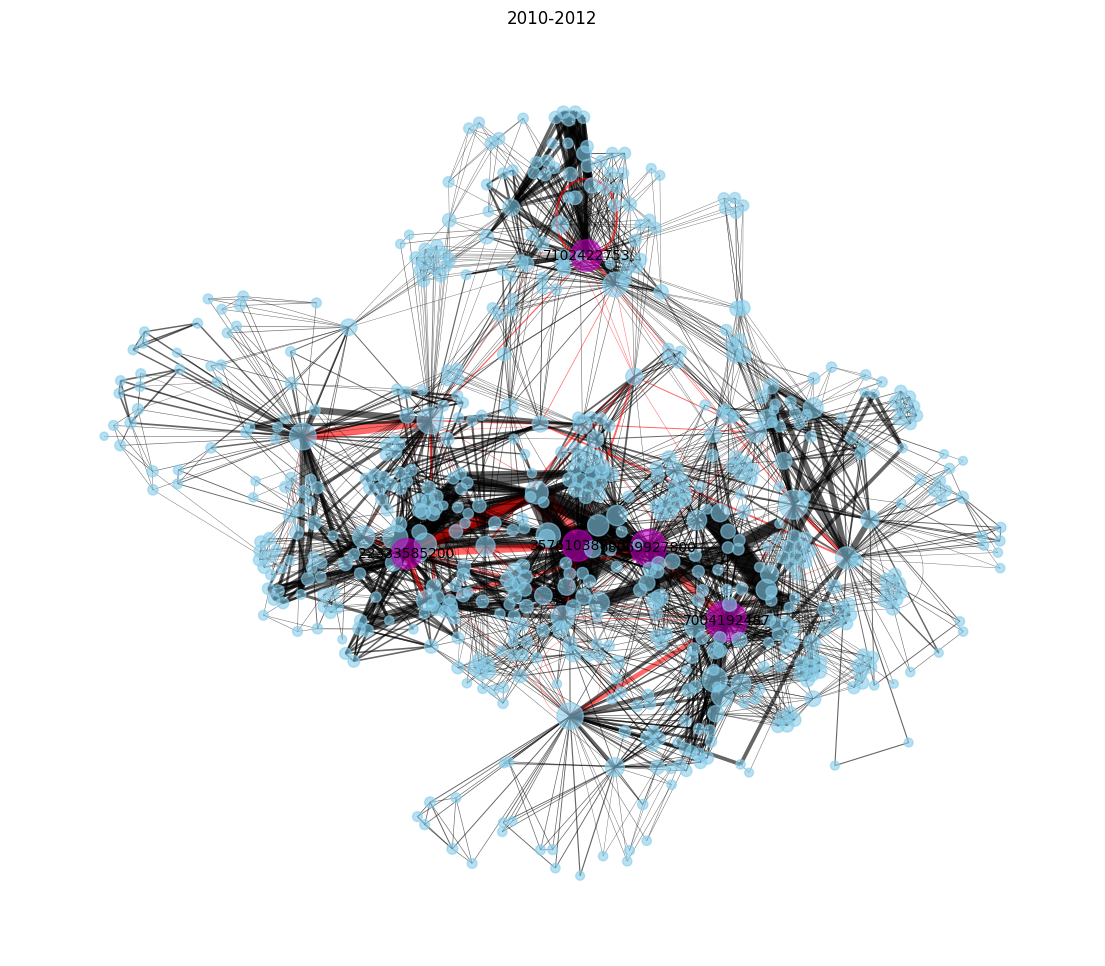

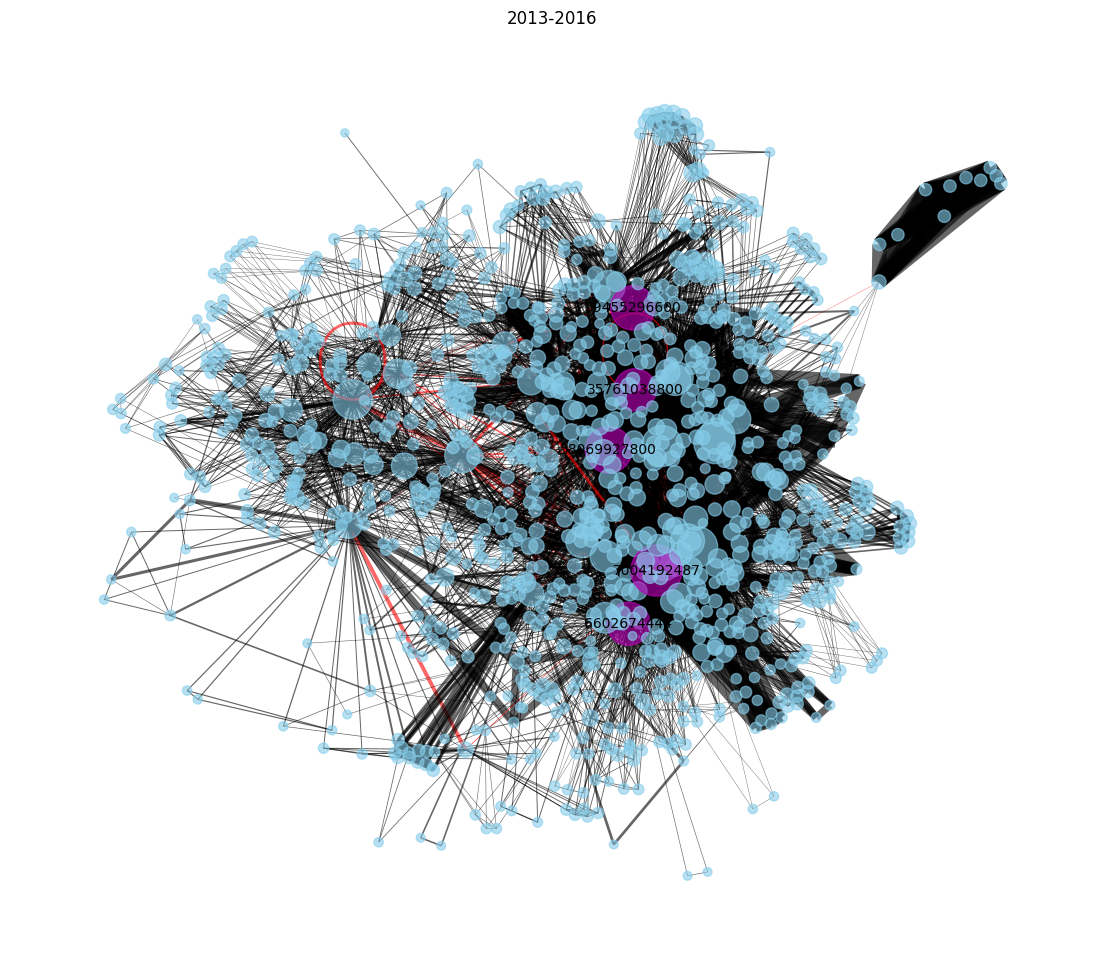

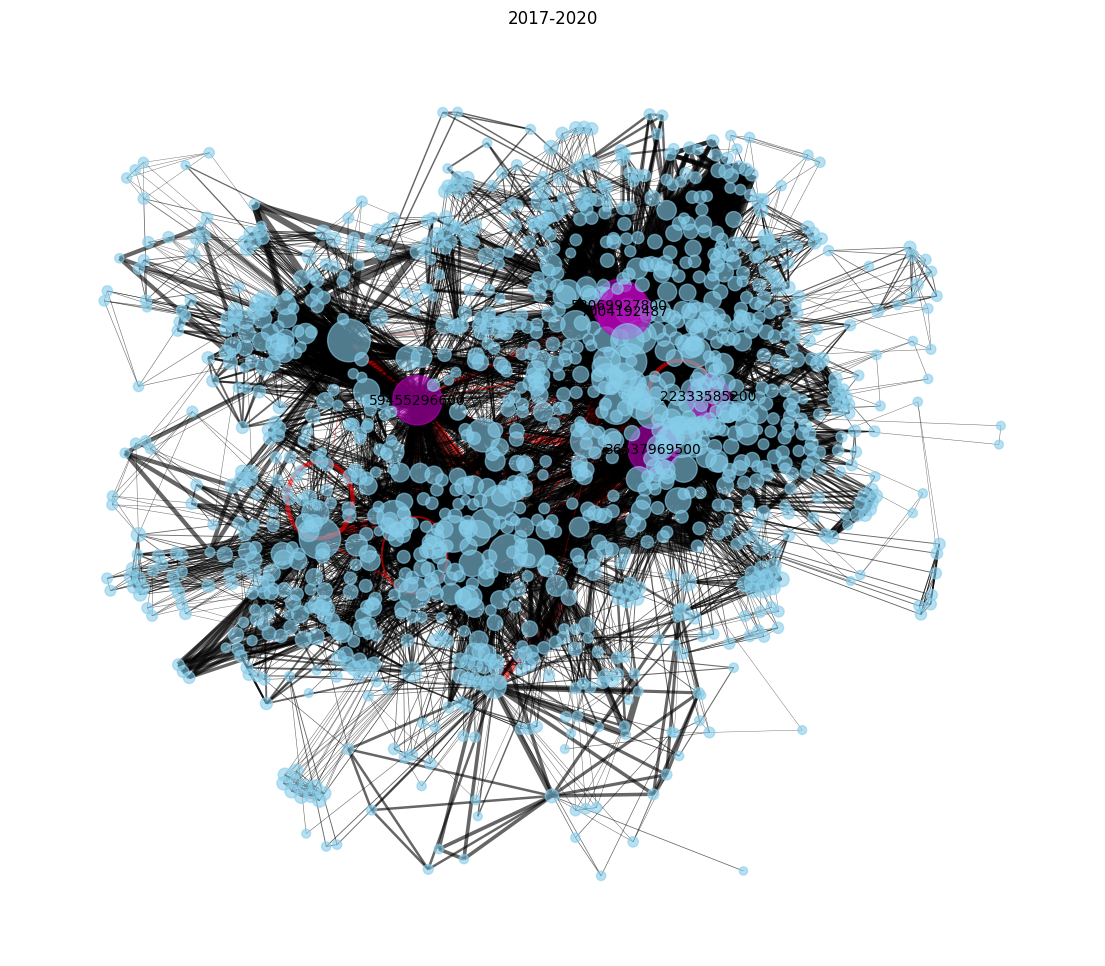

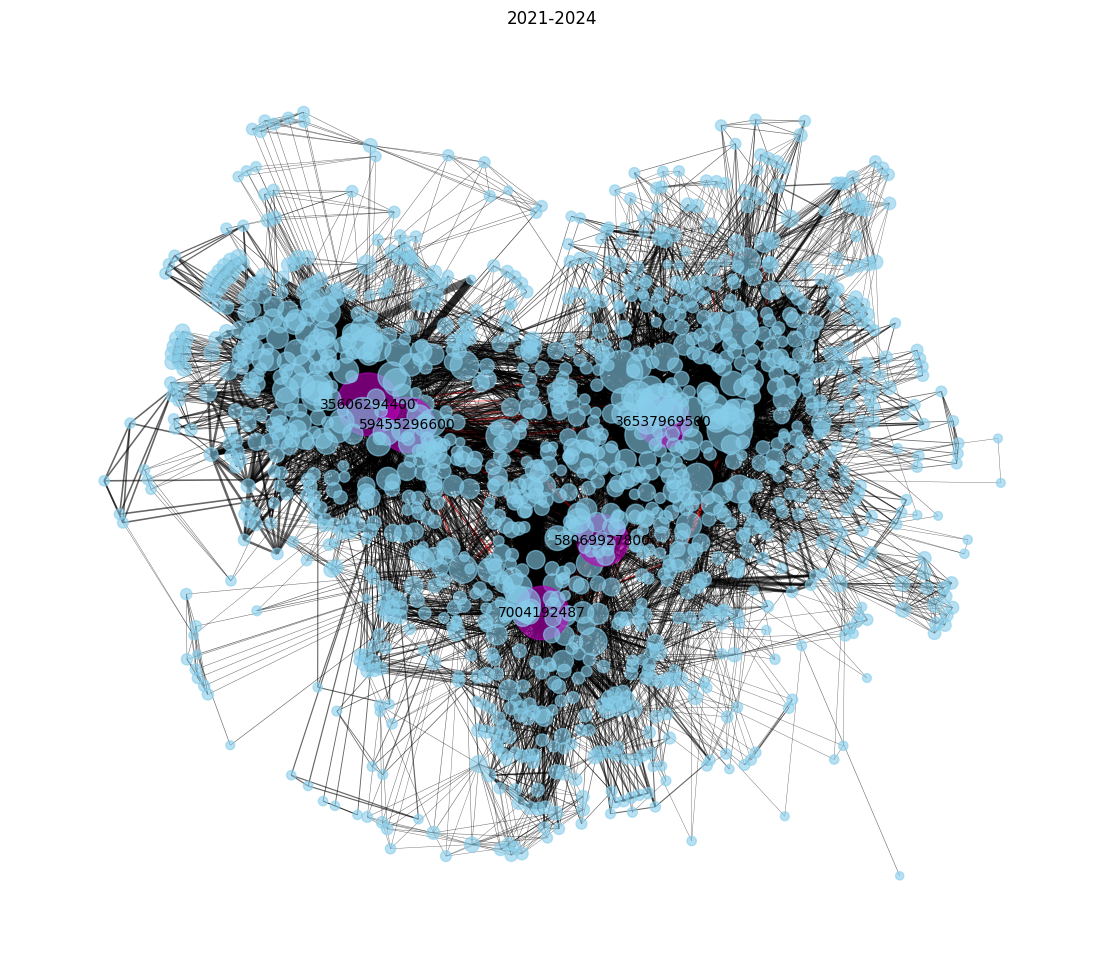

In [15]:
def Req2(arquivo: str, titulo: str):
    # Carrega o grafo a partir do arquivo
    G = nx.read_gexf(arquivo)

    # Calcula o grau de cada nó
    grau = dict(G.degree())

    # Determina os top 5 vértices com mais vizinhos
    top5 = sorted(grau, key=grau.get, reverse=True)[:5]

    # Define o tamanho dos nós proporcional ao número de vizinhos
    tamanhos = [30 + 5 * grau[n] for n in G.nodes()]

    # Define a cor dos nós (destacando os top 5 de magenta)
    cores_nos = ['m' if n in top5 else 'skyblue' for n in G.nodes()]

    # Define as cores e larguras das arestas
    cores_arestas = []
    larguras_arestas = []
    for u, v, dados in G.edges(data=True):
        # Verifica se ambos os nós são permanentes
        is_permanent_u = G.nodes[u].get('is_permanent', False)
        is_permanent_v = G.nodes[v].get('is_permanent', False)

        # Define cor da aresta
        if is_permanent_u and is_permanent_v:
            cores_arestas.append('r')
        else:
            cores_arestas.append('k')

        # Define largura da aresta com base nas citações
        citation_num = dados.get('citation_num', 0)
        larguras_arestas.append(0.3 + citation_num * 0.05)

    # Define a posição dos nós
    pos = nx.spring_layout(G, k=0.1618, seed=14)  # Usa layout forçado

    # aumentar a imagem
    plt.figure(figsize=(14, 12))

    # Desenha os nós
    nx.draw_networkx_nodes(G, pos, node_size=tamanhos, node_color=cores_nos, alpha=0.6)

    # Desenha as arestas
    nx.draw_networkx_edges(G, pos, edge_color=cores_arestas, width=larguras_arestas, alpha=0.6)

    # Identificar os top 5
    id = {n: n for n in top5}
    nx.draw_networkx_labels(G, pos, id, font_size=10, font_color='k')

    # Exibe o grafo
    plt.title(titulo)
    plt.axis('off')
    plt.show()

# Exemplo de uso
Arquivos=['2010-2012.gexf','2013-2016.gexf','2017-2020.gexf','2021-2024.gexf']
Anos=['2010-2012','2013-2016','2017-2020','2021-2024']

for i in range(4):
    Req2(Arquivos[i], Anos[i])


Requisito 2 -

O que foi feito:
> Inicialmente se estruturou um código simples que apenas plotaria o grafo com base no Notebook tutorial presente no repositório do professor, depois foi sendo modificado para atender as especificações do requisito, utilizou-se do chat gpt para deixar o código mais conciso e comenta-lo, com ajustes finais manuais.

Como foi feito:
> Utilizou-se o arquivo "2010-2012.gexf" como base para analizar o funcionamento do código. Nas iterações percebeu-se a necessidade da mudança do tamanho da figura plotada e dos parametros utilizados para opacidade dos vertices e arestas e disperção dos vertices na definição da posição para se melhorar a visualização, se aproximando do exemplo presente no slide do projeto.

Achados:
> Membros permanentes aparentam ser mais conectados(ter mais vizinhos) e terem mais citações. Arestas largas aparentam se concentrar nos mesmos vertices.

Dificuldades:
> As maiores dificuldades se relacionaram ao ajuste dos parametros e a dificuldade de vizualização com grafos mais populosos com o passar do tempo.

Hipóteses:
> Membros permanentes aparentam manter um maior número de citações entre eles, aparentando ter um certo grau de homofilia. Ser citado bastante por uma pessoa aparenta aumentar a chance de ser citado bastante por outra.

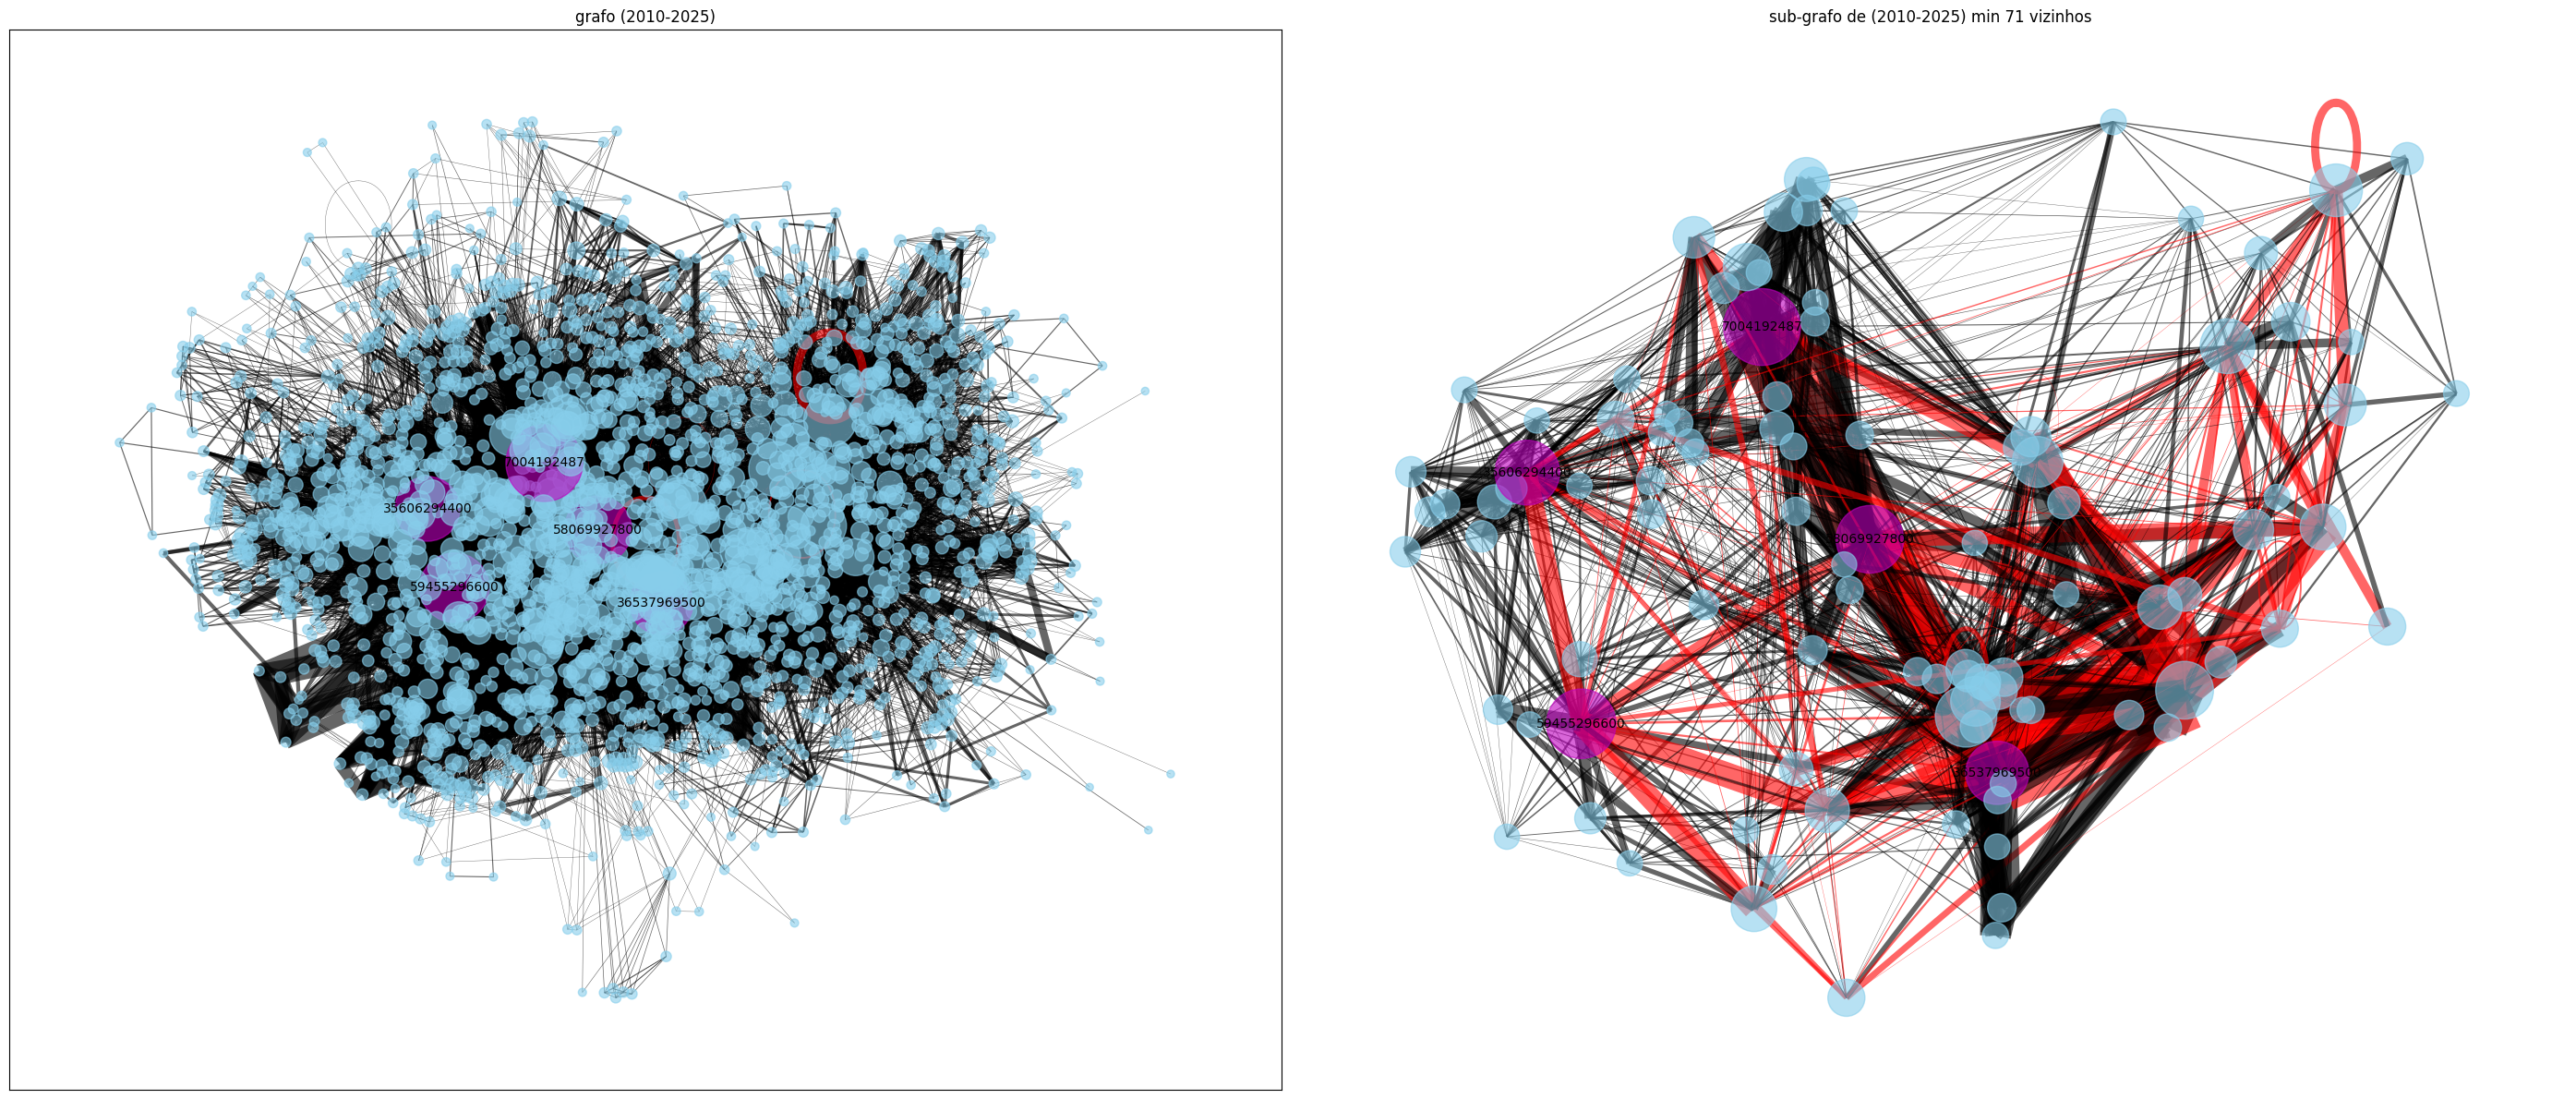

A densidade da rede geral é 0.008675902401164717
A densidade da rede filtrada é 0.2721801591923898


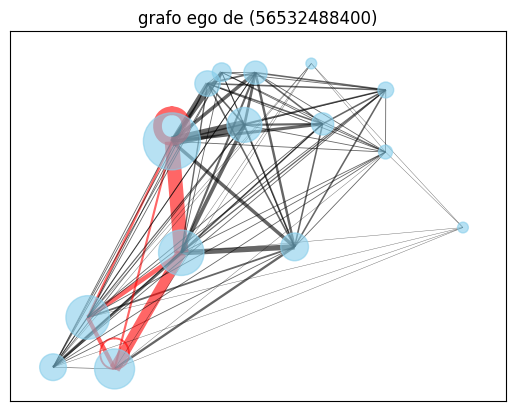

2454


In [16]:
def cor_larg(G: nx.Graph):
    cores_arestas = []
    larguras_arestas = []

    for u, v, dados in G.edges(data=True):
        # Verifica se ambos os nós são permanentes
        is_permanent_u = G.nodes[u].get('is_permanent', False)
        is_permanent_v = G.nodes[v].get('is_permanent', False)

        # Define cor da aresta
        if is_permanent_u and is_permanent_v:
            cores_arestas.append('r')
        else:
            cores_arestas.append('k')

        # Define largura da aresta com base nas citações
        citation_num = dados.get('citation_num', 0)
        larguras_arestas.append(0.3 + citation_num * 0.05)

    return cores_arestas,larguras_arestas

def drawGraph(G: nx.Graph, pos, tamanhos, cores_nos, cores_arestas, larguras_arestas):
    # Desenha os nós
    nx.draw_networkx_nodes(G, pos, node_size=tamanhos, node_color=cores_nos, alpha=0.6)

    # Desenha as arestas
    nx.draw_networkx_edges(G, pos, edge_color=cores_arestas, width=larguras_arestas, alpha=0.6)


def ego(G: nx.Graph, pos, grau, top5):
    # Cria uma rede ego de um nó aleatório
    random.seed(14) # Define seed para replicabilidade
    no = random.choice(list(G.nodes()))
    ego=nx.ego_graph(G, no, radius=1)

    # Definindo os parametros para plotar
    tamanhos_ego = [30 + 5 * grau[n] for n in ego.nodes()]
    cores_nos_ego = ['m' if n in top5 else 'skyblue' for n in ego.nodes()]
    cores_arestas, larguras_arestas = cor_larg(ego)

    # Desenha a rede ego
    drawGraph(ego, pos, tamanhos_ego, cores_nos_ego, cores_arestas, larguras_arestas)
    plt.title(f"grafo ego de ({no})")
    plt.show()

def Req3(G: nx.Graph, x: int, Ano: str):

    # Cria sub-grafo com os nós com no mínimo x vizinhos
    nos_filtrados = [n for n, d in G.degree() if d >= x]
    sG = G.subgraph(nos_filtrados).copy()

    # Calcula o grau de cada nó
    grau = dict(G.degree())

    # Determina os top 5 vértices com mais vizinhos
    top5 = sorted(grau, key=grau.get, reverse=True)[:5]

    # Define o tamanho dos nós proporcional ao número de vizinhos
    tamanhos = [30 + 5 * grau[n] for n in G.nodes()]
    tamanhos_sg = [30 + 5 * grau[n] for n in sG.nodes()]

    # Define a cor dos nós (destacando os top 5 de magenta)
    cores_nos = ['m' if n in top5 else 'skyblue' for n in G.nodes()]
    cores_nos_sg = ['m' if n in top5 else 'skyblue' for n in sG.nodes()]

    # Define as cores e larguras das arestas do grafo principal
    cores_arestas, larguras_arestas = cor_larg(G)

    # Define as cores e larguras das arestas do subgrafo
    cores_arestas_sg, larguras_arestas_sg = cor_larg(sG)

    # Define a posição dos nós
    pos = nx.spring_layout(G, k=0.14, seed=14)  # Usa layout forçado

    # aumentar a imagem
    plt.figure(figsize=(28, 12))


    plt.subplot(1, 2, 1)

    # Desenha a rede geral
    drawGraph(G, pos, tamanhos, cores_nos, cores_arestas, larguras_arestas)

    # Identificar os top 5
    id = {n: n for n in top5}
    nx.draw_networkx_labels(G, pos, id, font_size=10, font_color='k')

    plt.title(f"grafo ({Ano})")

    plt.subplot(1, 2, 2)
    # Desenha o sub-grafo
    drawGraph(sG, pos, tamanhos_sg, cores_nos_sg, cores_arestas_sg, larguras_arestas_sg)

    # Identificar os top 5
    nx.draw_networkx_labels(sG, pos, id, font_size=10, font_color='k')

    plt.title(f"sub-grafo de ({Ano}) min {x} vizinhos")


    # Exibe o grafos
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Printa a densidade
    print(f"A densidade da rede geral é {nx.density(G)}")
    print(f"A densidade da rede filtrada é {nx.density(sG)}")

    # Utiliza a função ego
    ego(G, pos, grau, top5)


# Exemplo de uso
G = nx.read_gexf('2010-2025.gexf')
Req3(G, 71,'2010-2025') # 71 = 10% do valor maximo de vizinhos: "max(dict(G.degree()).values())//10"
print(G.number_of_nodes())


Requisito 3 -

O que foi feito:
> Inicialmente se estruturou um código simples que apenas plotaria o grafo e seu subgrafo a partir do filtro associado a um valor X, assim como a função que gera e plota a rede ego de um vertice, com base no Notebook tutorial presente no repositório do professor e auxilio do chat gpt na sintaxe, tembém utilizou-se do chat gpt para deixar o código mais conciso e comenta-lo, com ajustes finais manuais.

Como foi feito:
> Tratando-se de apenas um arquivo, utilizou-se dele desde o inicio para analizar o funcionamento do código. Houveram poucas iterações do código pela menor quantidade de parametros. E estabeleceu-se o valor de X como 10%(aproximadamente) do maior numero de vizinhos que um vertice tivesse no grafo original.

Achados:
> Ao efetuar a filtragem da criação do sub-grafo, a densidade, como esperado, aumenta. Já era esperado por diminuir o numero de vertices(diminuindo numa taxa quadratica o numero máximo de arestas), mantendo aqueles com mais conexões, fazeendo com que oo numero total de arestas diminua devagar.

Dificuldades:
> A principal dificuldade nesse requisito é a vizualização, por ter um grafo muito interconectado e populoso.

Hipóteses:
> Quanto mais restritivo a filtragem no quesito n° de vizinhos>=X, mais denso a filtragem. Com o efeito sendo inverso caso o quesito de filtragem seja < ou <=.